# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise de Dados com Linguagem Python</font>

## <font color='blue'>Projeto 10</font>
## <font color='blue'>Design e Construção de 50 Visualizações</font>
## <font color='blue'>Visualização 12</font>

![title](imagens/Projeto10.png)

## Pré-Requisitos

Recomendamos que você tenha concluído pelo menos os 5 primeiros capítulos do curso gratuito de <a href="https://www.datascienceacademy.com.br/course?courseid=python-fundamentos">Python Fundamentos Para Análise de Dados</a>. Recomendamos ainda o capítulo sobre Machine Learning nesse mesmo curso.

### Definição do Problema e Fonte de Dados

Leia os manuais em pdf no Capítulo 11 do curso.

Neste mini-projeto o objetivo será compreender a evolução do preço das ações da AstraZeneca.

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [3]:
!pip install -q yfinance

In [4]:
!pip install -q pandas_datareader

In [5]:
# Imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

numpy            : 1.21.5
sqlite3          : 2.6.0
matplotlib       : 3.4.3
pandas_datareader: 0.10.0
pandas           : 1.3.5
yfinance         : 0.1.70



In [7]:
AZN = "AZN" 

In [8]:
AZN = yfinance.download(AZN)

[*********************100%***********************]  1 of 1 completed


In [9]:
AZN.shape

(7257, 6)

In [10]:
AZN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-05-12,5.291667,5.291667,5.020833,5.041667,1.817252,414000
1993-05-13,5.000000,5.000000,4.791667,4.854167,1.749668,792600
1993-05-14,4.875000,4.875000,4.791667,4.791667,1.727141,646200
1993-05-17,4.833333,4.895833,4.833333,4.895833,1.764686,68400
1993-05-18,4.895833,4.895833,4.833333,4.854167,1.749668,69000


In [11]:
AZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7.257000e+03
mean,25.501578,25.692309,25.318329,25.512085,17.352766,2.860656e+06
std,11.806065,11.887908,11.712342,11.795112,13.446832,3.371709e+06
min,4.479167,4.500000,4.479167,4.479167,1.614500,2.400000e+03
25%,19.875000,20.045000,19.687500,19.875000,9.097338,8.524000e+05
50%,23.400000,23.565001,23.250000,23.424999,12.622848,2.158400e+06
75%,30.820000,31.070000,30.575001,30.840000,24.538593,3.713000e+06
max,63.950001,64.940002,63.509998,63.830002,62.791473,6.554020e+07


In [12]:
AZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7257 entries, 1993-05-12 to 2022-03-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7257 non-null   float64
 1   High       7257 non-null   float64
 2   Low        7257 non-null   float64
 3   Close      7257 non-null   float64
 4   Adj Close  7257 non-null   float64
 5   Volume     7257 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 396.9 KB


In [13]:
conn = sqlite3.connect("dados/AZN.db")
c = conn.cursor()

In [14]:
AZN.to_sql("AZN", conn, if_exists = 'replace')

In [15]:
# Visualiza os dados
c.execute("""SELECT * FROM AZN""")
rows = c.fetchall()
rows

[('1993-05-12 00:00:00',
  5.2916669845581055,
  5.2916669845581055,
  5.0208330154418945,
  5.0416669845581055,
  1.8172520399093628,
  414000),
 ('1993-05-13 00:00:00',
  5.0,
  5.0,
  4.7916669845581055,
  4.8541669845581055,
  1.7496682405471802,
  792600),
 ('1993-05-14 00:00:00',
  4.875,
  4.875,
  4.7916669845581055,
  4.7916669845581055,
  1.7271405458450317,
  646200),
 ('1993-05-17 00:00:00',
  4.8333330154418945,
  4.8958330154418945,
  4.8333330154418945,
  4.8958330154418945,
  1.7646864652633667,
  68400),
 ('1993-05-18 00:00:00',
  4.8958330154418945,
  4.8958330154418945,
  4.8333330154418945,
  4.8541669845581055,
  1.7496682405471802,
  69000),
 ('1993-05-19 00:00:00',
  4.8541669845581055,
  4.875,
  4.8541669845581055,
  4.875,
  1.7571772336959839,
  72000),
 ('1993-05-20 00:00:00',
  4.875,
  4.8958330154418945,
  4.8541669845581055,
  4.875,
  1.7571772336959839,
  118800),
 ('1993-05-21 00:00:00',
  4.875,
  4.875,
  4.875,
  4.875,
  1.7571772336959839,
  1320

In [16]:
# Salva em disco
AZN.to_excel("dados/AZN.xls")

In [17]:
# Carrega do disco
df = pd.read_excel("dados/AZN.xls")

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-05-12,5.291667,5.291667,5.020833,5.041667,1.817252,414000
1,1993-05-13,5.000000,5.000000,4.791667,4.854167,1.749668,792600
2,1993-05-14,4.875000,4.875000,4.791667,4.791667,1.727141,646200
3,1993-05-17,4.833333,4.895833,4.833333,4.895833,1.764686,68400
4,1993-05-18,4.895833,4.895833,4.833333,4.854167,1.749668,69000


In [19]:
df['Date']

0      1993-05-12
1      1993-05-13
2      1993-05-14
3      1993-05-17
4      1993-05-18
          ...    
7252   2022-02-28
7253   2022-03-01
7254   2022-03-02
7255   2022-03-03
7256   2022-03-04
Name: Date, Length: 7257, dtype: datetime64[ns]

In [20]:
df['Close']

0        5.041667
1        4.854167
2        4.791667
3        4.895833
4        4.854167
          ...    
7252    60.880001
7253    61.340000
7254    62.000000
7255    60.070000
7256    57.470001
Name: Close, Length: 7257, dtype: float64

> Dataviz 12 - Gráfico de Linha com a evolução da variável preço ao longo do tempo

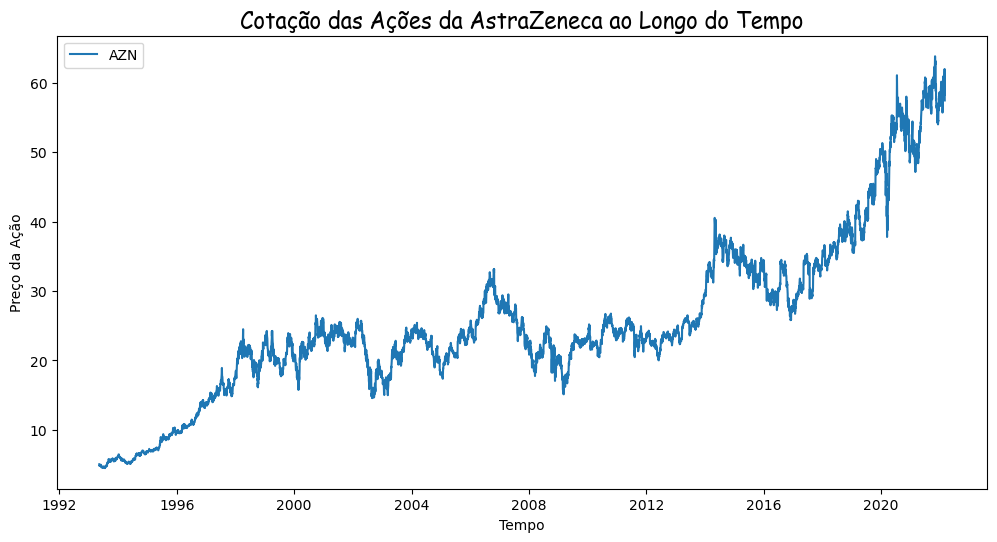

In [21]:
# Dataviz 12

# Dados
x = df['Date']
y = df['Close']

# Tamanho do gráfico (dpi especifica pixels por polegada)
plt.figure(figsize = (12,6), dpi = 100)

# Plot
plt.plot(x, y, label = 'AZN')

# Título
plt.title('Cotação das Ações da AstraZeneca ao Longo do Tempo', 
          fontdict = {'fontname': 'Comic Sans MS', 'fontsize': 16})

# Label
plt.xlabel('Tempo')
plt.ylabel('Preço da Ação')

# Inclui legenda
plt.legend()

# Salva a figura com alta resolução
plt.savefig('imagens/dataviz12.png', dpi = 300)

# Plot
plt.show()

# Fim